# Clustering
Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data. It is a type of unsupervised learning algorithm.

# K-means Clustering
It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

How does the K-Means Algorithm Work?
The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.

In [3]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1, inplace=True)
data.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math score     1000 non-null   int64
 1   reading score  1000 non-null   int64
 2   writing score  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [8]:
data = data[['math score','reading score']].rename(columns={'math score':'x', 'reading score':'y'})
data

,x,y
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78
...,...,...
995,88,99
996,62,55
997,59,71
998,68,78


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       1000 non-null   int64
 1   y       1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


<AxesSubplot:>

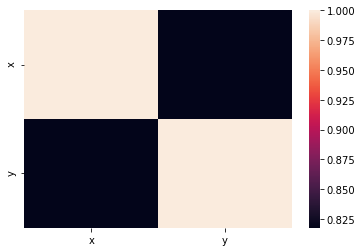

In [10]:
import seaborn as sns
corr = data.corr()
plt.figure()
sns.heatmap(corr)

In [11]:
k=3
centroids ={
    i:[np.random.randint(data['x'].min(), data['x'].max()),np.random.randint(data['y'].min(), data['y'].max())] for i in range(k)
}
print(centroids)

{0: [85, 88], 1: [2, 54], 2: [72, 66]}


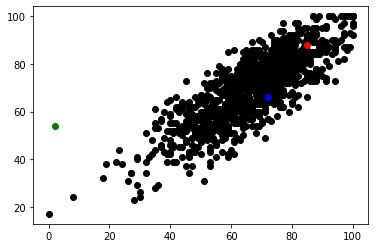

In [12]:
fig = plt.Figure(figsize=(5,5))
plt.scatter(data['x'],data['y'], color='k')
colmap={0:'r', 1:'g', 2:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
kmeans.cluster_centers_

def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

data['Cluster'] = data['x'].apply(converter)
display(data.head())

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],kmeans.labels_))
print(classification_report(data['Cluster'],kmeans.labels_))

,x,y,Cluster
0,72,72,0
1,69,90,0
2,90,95,0
3,47,57,0
4,76,78,0


[[307 447 246]
 [  0   0   0]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       1.00      0.31      0.47      1000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.31      1000
   macro avg       0.33      0.10      0.16      1000
weighted avg       1.00      0.31      0.47      1000



C:\Users\Khushboo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khushboo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khushboo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
def closest(data, centroids):
    for i in centroids.keys():
        data["dist_{}".format(i)] = (np.sqrt((data['x']-centroids[i][0])**2 +(data['y']-centroids[i][1])**2)) 
    dist_cols = ['dist_{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:,dist_cols].idxmin(axis=1)
    print(data['closest'].dtype)
    data['closest'] = data['closest'].map(lambda x : int(x.lstrip('dist_')))
    data['color'] =  data['closest'].map(lambda x : colmap[x])
    print(data)
    return data
data =closest(data, centroids)

object
      x   y  Cluster     dist_0     dist_1     dist_2  closest color
0    72  72        0  20.615528  72.277244   6.000000        2     b
1    69  90        0  16.124515  76.059187  24.186773        0     r
2    90  95        0   8.602325  97.082439  34.132096        0     r
3    47  57        0  49.040799  45.099889  26.570661        2     b
4    76  78        0  13.453624  77.794601  12.649111        2     b
..   ..  ..      ...        ...        ...        ...      ...   ...
995  88  99        0  11.401754  97.061836  36.674242        0     r
996  62  55        0  40.224371  60.008333  14.866069        2     b
997  59  71        0  31.064449  59.481089  13.928388        2     b
998  68  78        0  19.723083  70.228199  12.649111        2     b
999  77  86        0   8.246211  81.541401  20.615528        0     r

[1000 rows x 8 columns]


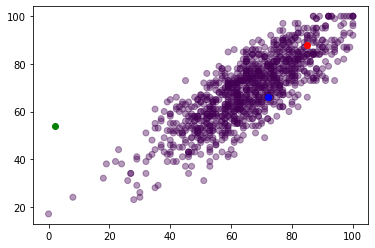

In [15]:
plt.scatter(data['x'],data['y'], c=data['Cluster'], alpha=0.4)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])


{0: [83.33587786259542, 86.32442748091603], 1: [30.394736842105264, 39.76315789473684], 2: [61.57142857142857, 64.34428571428572]}


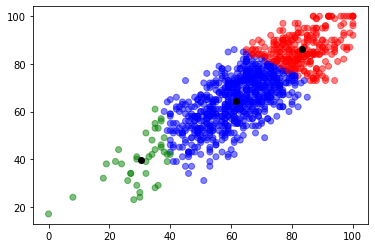

In [16]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest']==i]['x'])
        centroids[i][1] = np.mean(data[data['closest']==i]['y'])
    return k
centroids = update(centroids)
print(centroids)

plt.scatter(data['x'],data['y'],c= data['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k')

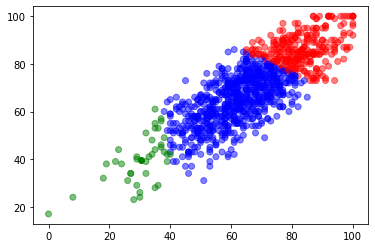

In [17]:
import copy
while True:
    closest_centroids = data['closest'].copy(deep=True)
    centroids = update(centroids)
    if closest_centroids.equals(data['closest']):
        break


plt.scatter(data['x'],data['y'], c=data['color'], alpha = 0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], c=colmap[i])
plt.show()